In [ ]:
# Import necessary libraries
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Connect to MySQL
db = mysql.connector.connect(
    host="localhost",       # Replace with your host (e.g., "127.0.0.1")
    user="root",   # Your MySQL username
    password="271045", # Your MySQL password
    database="project" # Optional: specify database to connect to
)

# Check connection
if db.is_connected():
    print("Connected to MySQL!")

Connected to MySQL!


# Create cursor object to execute sql queries
cursor = db.cursor()
# Query the data from cybersecurity attacks
cursor.execute("SELECT * FROM attacks")
# After fetching data from the database we are storing it into Pandas DataFrame
df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the Data
print(df)

In [ ]:
# Print first 5 rows
df.head()

,Year,Month,Day,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,...,User Information,Device Information,Network Segment,States,Proxy Information,Firewall Logs,IPS Alerts,Log Source,Source IP Address,Destination IP Address
0,2023,May,30,31225,17616,ICMP,503,Data,HTTP,IoC Detected,...,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,Sikkim,150.9.97.135,Log Data,Unknown,Server,103.216.15.12,84.9.164.252
1,2020,August,26,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,...,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,Nagaland,Unknown,Log Data,Unknown,Firewall,78.199.217.198,66.191.137.154
2,2022,November,13,16811,53600,UDP,306,Control,HTTP,IoC Detected,...,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,Rajasthan,114.133.48.179,Log Data,Alert Data,Firewall,63.79.210.48,198.219.82.17
3,2023,July,2,20018,32534,UDP,385,Data,HTTP,Unknown,...,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,Rajasthan,Unknown,Unknown,Alert Data,Firewall,163.42.196.10,101.228.192.255
4,2023,July,16,6131,26646,TCP,1462,Data,DNS,Unknown,...,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,Tripura,149.6.110.119,Unknown,Alert Data,Firewall,71.166.185.76,189.243.174.238


In [ ]:
# Print last 5 rows
df.tail()

,Year,Month,Day,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,...,User Information,Device Information,Network Segment,States,Proxy Information,Firewall Logs,IPS Alerts,Log Source,Source IP Address,Destination IP Address
9995,2023,June,21,41336,35718,UDP,646,Control,HTTP,IoC Detected,...,Rhea Badami,Opera/9.57.(X11; Linux i686; bem-ZM) Presto/2....,Segment C,Odisha,Unknown,Log Data,Alert Data,Server,207.36.67.147,22.71.153.34
9996,2021,December,5,21123,56616,TCP,183,Control,FTP,Unknown,...,Neysa Rajagopal,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,Punjab,Unknown,Unknown,Unknown,Firewall,75.232.195.197,90.65.249.10
9997,2020,November,4,63616,45112,UDP,534,Control,DNS,IoC Detected,...,Shray Khanna,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_3 ...,Segment A,Haryana,Unknown,Unknown,Alert Data,Firewall,139.113.86.1,204.183.169.41
9998,2021,August,15,41089,56335,UDP,1135,Data,FTP,Unknown,...,Jayesh Chandran,Mozilla/5.0 (Linux; Android 1.5) AppleWebKit/5...,Segment A,Arunachal Pradesh,Unknown,Unknown,Unknown,Firewall,222.0.110.95,112.67.229.207
9999,2023,January,21,13187,9200,ICMP,127,Data,DNS,IoC Detected,...,Zaina Chandran,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,Segment B,Goa,50.239.49.71,Log Data,Unknown,Server,175.204.253.199,31.93.16.146


In [ ]:
# Print the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    10000 non-null  int64  
 1   Month                   10000 non-null  object 
 2   Day                     10000 non-null  int64  
 3   Source Port             10000 non-null  int64  
 4   Destination Port        10000 non-null  int64  
 5   Protocol                10000 non-null  object 
 6   Packet Length           10000 non-null  int64  
 7   Packet Type             10000 non-null  object 
 8   Traffic Type            10000 non-null  object 
 9   Malware Indicators      10000 non-null  object 
 10  Anomaly Scores          10000 non-null  float64
 11  Alerts                  10000 non-null  object 
 12  Attack Type             10000 non-null  object 
 13  Attack Signature        10000 non-null  object 
 14  Action Taken            10000 non-null 

In [ ]:
# To know the total number of rows and columns in the DataFrame
df.shape

(10000, 26)

In [ ]:
# Shows basic statistics (like mean, min, max) for each numerical column in the DataFrame
df.describe()

,Year,Day,Source Port,Destination Port,Packet Length,Anomaly Scores
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2021.416300,15.679500,32887.124600,33322.148600,788.300700,50.133293
std,1.090923,8.816074,18584.108978,18566.592442,416.770235,28.900739
min,2020.000000,1.000000,1028.000000,1030.000000,64.000000,0.000000
25%,2020.000000,8.000000,16650.000000,17404.000000,429.000000,25.285000
50%,2021.000000,16.000000,32739.000000,33345.000000,792.000000,50.115000
75%,2022.000000,23.000000,48914.250000,49493.750000,1148.250000,75.332500
max,2023.000000,31.000000,65530.000000,65535.000000,1500.000000,99.990000


In [ ]:
# Counting all null values in the DataFrame
df.isnull().sum()

Year                      0
Month                     0
Day                       0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Malware Indicators        0
Anomaly Scores            0
Alerts                    0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
States                    0
Proxy Information         0
Firewall Logs             0
IPS Alerts                0
Log Source                0
Source IP Address         0
Destination IP Address    0
dtype: int64

In [ ]:
# Fetching Unique Values from the DataFrame
df.nunique()

Year                          4
Month                        12
Day                          31
Source Port                9262
Destination Port           9258
Protocol                      3
Packet Length              1434
Packet Type                   2
Traffic Type                  3
Malware Indicators            2
Anomaly Scores             6323
Alerts                        2
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information           9461
Device Information         8359
Network Segment               3
States                       28
Proxy Information          5048
Firewall Logs                 2
IPS Alerts                    2
Log Source                    2
Source IP Address         10000
Destination IP Address    10000
dtype: int64

# Exploratory Data Analysis

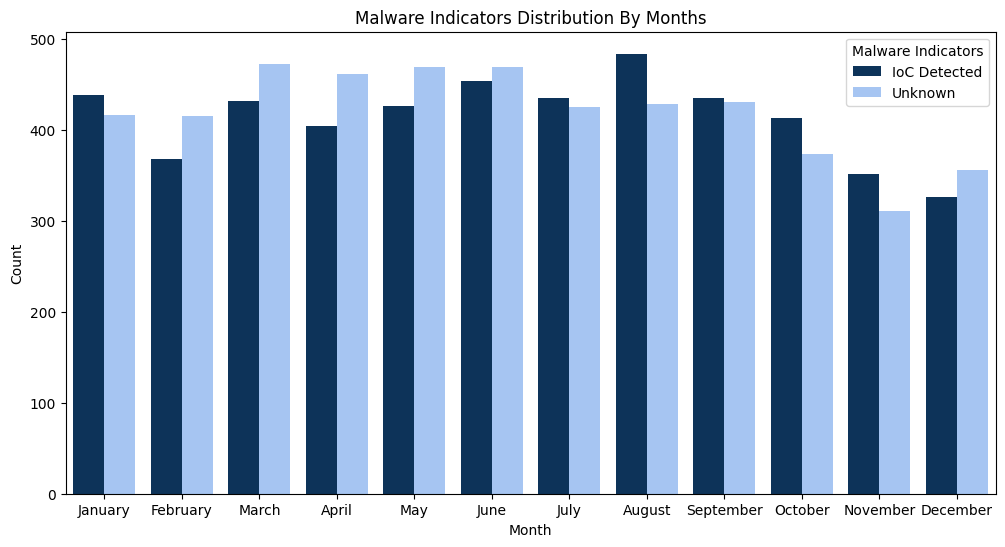

In [ ]:
# Convert the 'Month' column to a categorical type with ordered months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
# Set the figure size
plt.figure(figsize=(12, 6))
# Define a color palette for the bars
colors = ["#003366", "#99c2ff"]
# Create a count plot with ordered months
sns.countplot(data=df, x="Month", hue='Malware Indicators', palette=colors)
# Set the title
plt.title("Malware Indicators Distribution By Months")
# Label the x-axis
plt.xlabel("Month")
# Label the y-axis
plt.ylabel("Count")
# Display the plot
plt.show()

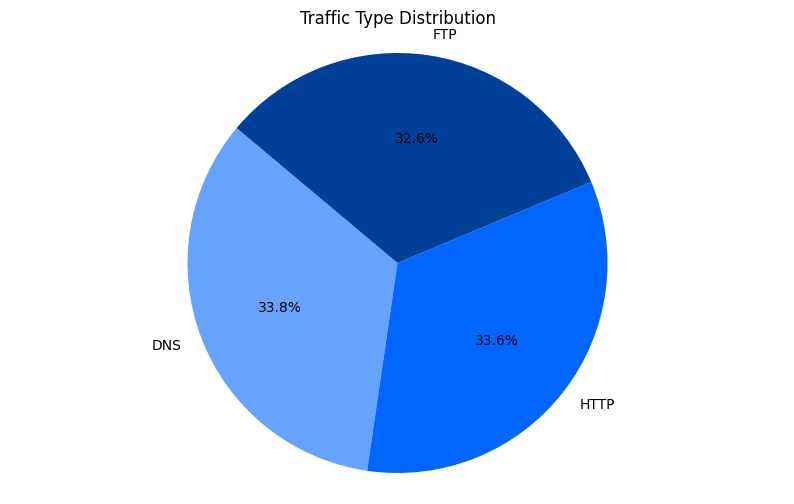

In [ ]:
# Count the occurrences of each traffic type in the DataFrame
traffic_counts = df['Traffic Type'].value_counts()
# Set the figure size
plt.figure(figsize=(10, 6))
# Define a color palette for the pie chart segments
colors = ["#66a3ff", "#0066ff", "#004099"]
# Create a pie chart
plt.pie(traffic_counts, labels=traffic_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
# Set the title
plt.title('Traffic Type Distribution')
# Ensure the pie chart is a circle by setting the aspect ratio to equal
plt.axis('equal')
# Display the plot
plt.show()

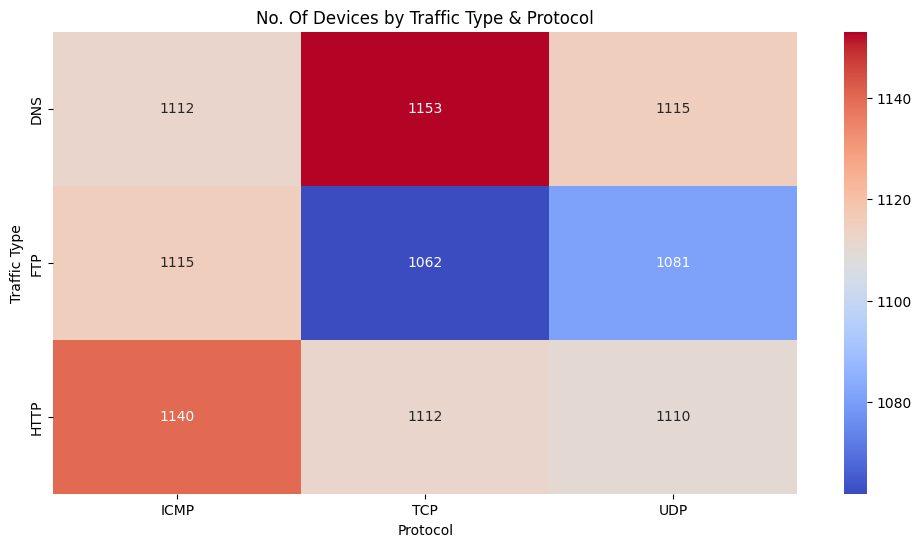

In [ ]:
# Create a pivot table to summarize the count of devices by traffic type and protocol
pivot_table = df.pivot_table(index="Traffic Type", columns="Protocol", values="Device Information", aggfunc="count")
# Set the figure size
plt.figure(figsize=(12, 6))
# Create a heatmap
sns.heatmap(pivot_table, annot=True, fmt='g', cmap="coolwarm")
# Set the title
plt.title("No. Of Devices by Traffic Type & Protocol")
# Label the x-axis
plt.xlabel("Protocol")
# Label the y-axis
plt.ylabel("Traffic Type")
# Display the plot
plt.show()

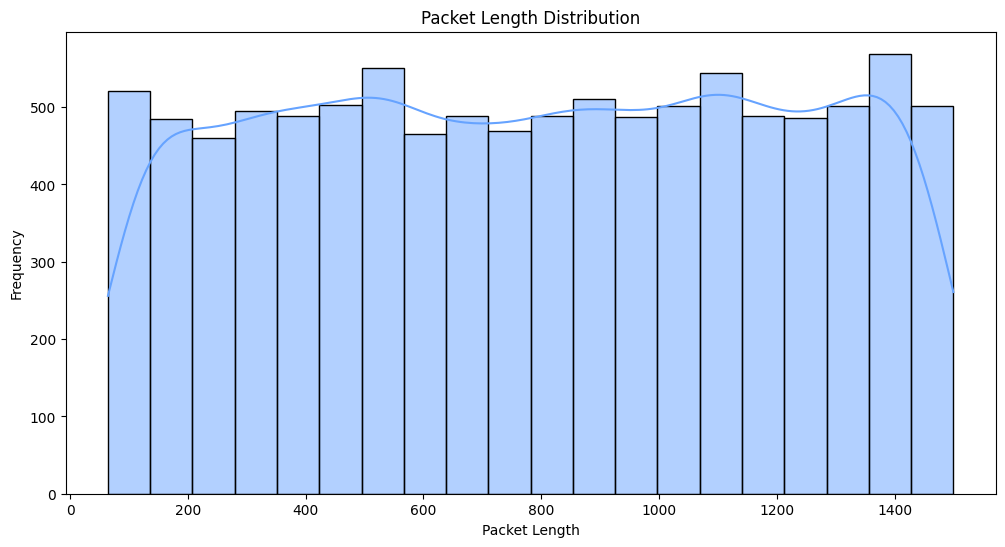

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))
# Create a histogram
sns.histplot(data=df, x="Packet Length", bins=20, kde=True, color="#66a3ff")
# Set the title
plt.title("Packet Length Distribution")
# Label the x-axis
plt.xlabel("Packet Length")
# Label the y-axis
plt.ylabel("Frequency")
# Display the histogram
plt.show()

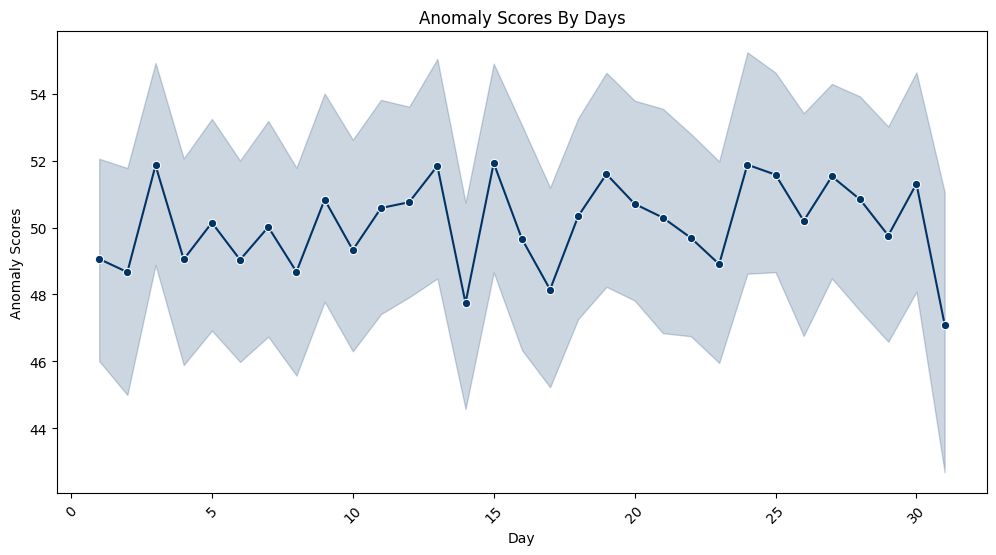

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))
# Create a line plot
sns.lineplot(data=df, x="Day", y="Anomaly Scores", marker="o", color="#003366")
# Set the title
plt.title("Anomaly Scores By Days")
# Rotate the x-axis labels
plt.xticks(rotation=45)
# Display the plot
plt.show()

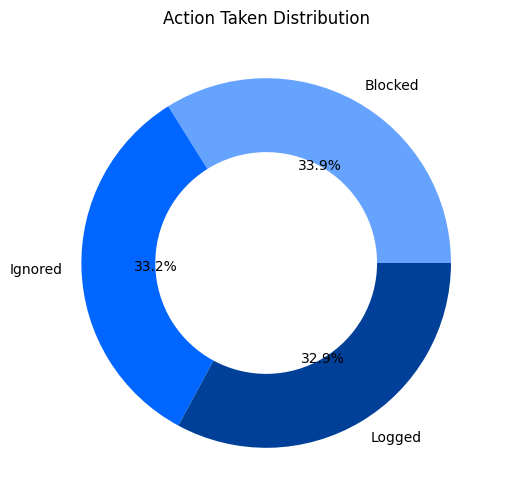

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))
# Define a color palette for the donut chart
color = ["#66a3ff", "#0066ff", "#004099"]
# Count the occurrences of each action taken in the dataset
action_counts = df["Action Taken"].value_counts()
# Create a donut chart
plt.pie(action_counts, labels=action_counts.index, autopct="%1.1f%%", colors=color, wedgeprops={"width": 0.4})
# Set the title
plt.title("Action Taken Distribution")
# Display the chart
plt.show()

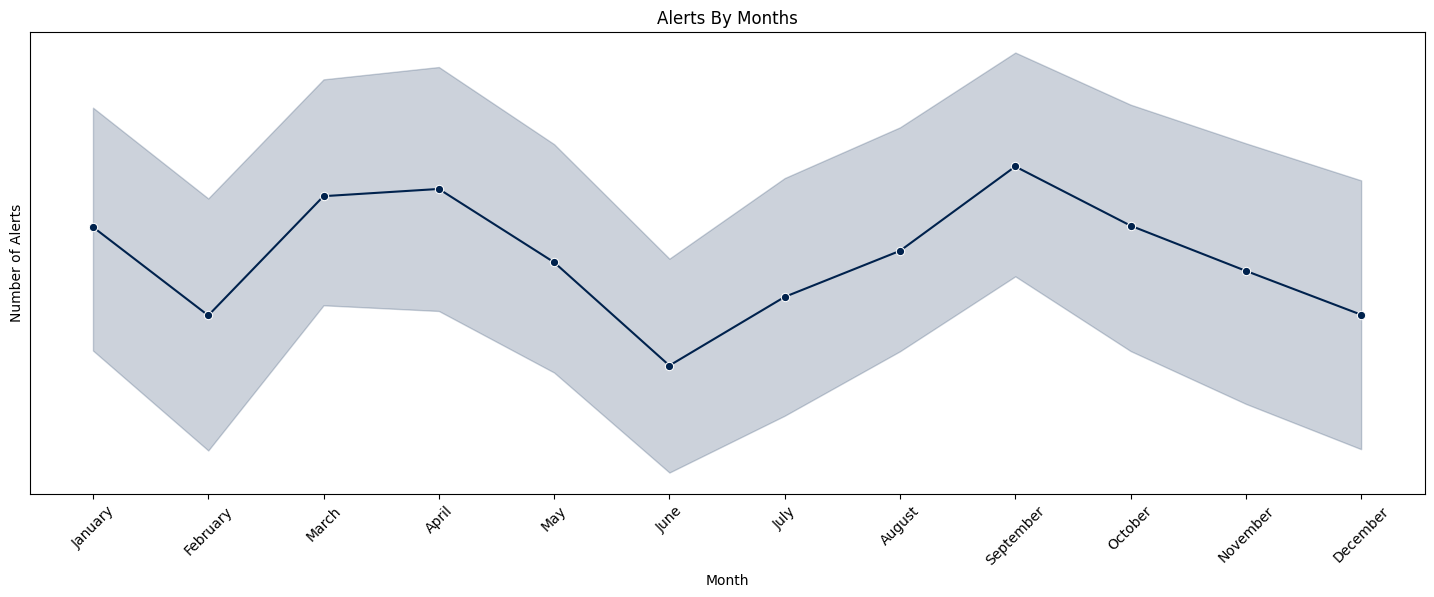

In [ ]:
# Convert the 'Month' column to a categorical type with ordered months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
# Set the figure size
plt.figure(figsize=(18, 6))
# Create a line plot
sns.lineplot(data=df, x="Month", y="Alerts", marker="o", color="#00224d")
# Set the title
plt.title("Alerts By Months")
# Rotate the x-axis labels
plt.xticks(rotation=45)
# Label the x-axis
plt.xlabel("Month")
# Label the y-axis
plt.ylabel("Number of Alerts")
# Display the plot
plt.show()

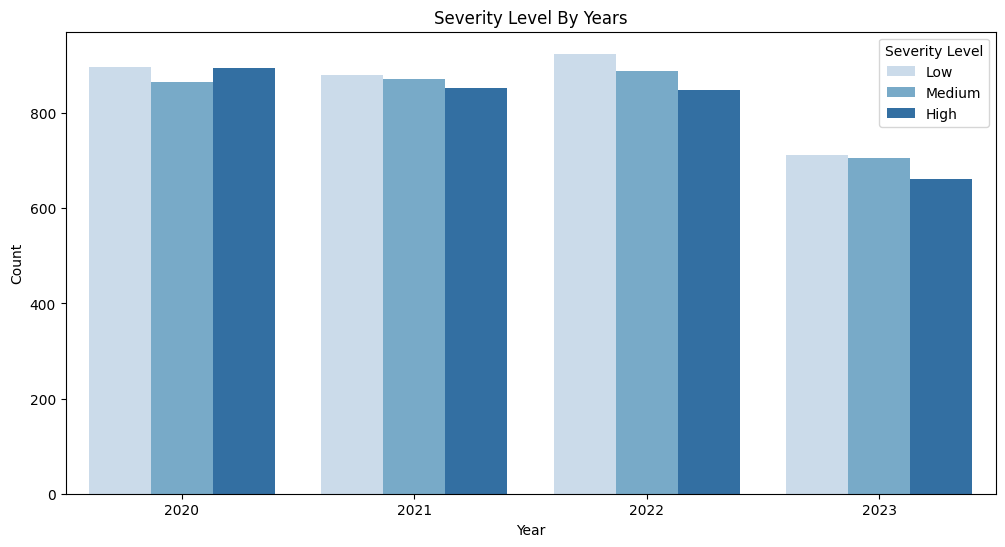

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))
# Create a bar plot
sns.countplot(data=df, x="Year", hue="Severity Level", palette="Blues")
# Set the title for the bar plot to describe the data being visualized
plt.title("Severity Level By Years")
# Label the x-axis
plt.xlabel("Year")
# Label the y-axis
plt.ylabel("Count")
# Display the plot
plt.show()

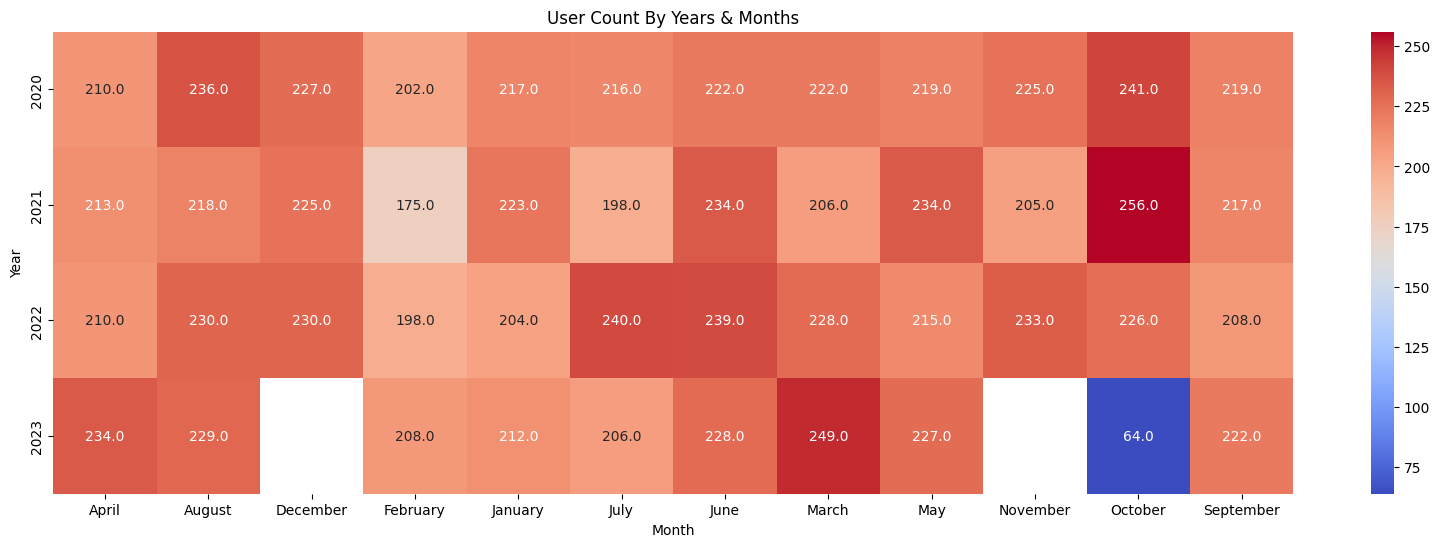

In [ ]:
# Create a pivot table to summarize user information data by year and month
pivot_table = df.pivot_table(index="Year", columns="Month", values="User Information", aggfunc="count")
# Set the figure size
plt.figure(figsize=(20, 6))
# Create a heatmap
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm")
# Set the title
plt.title("User Count By Years & Months")
# Label the x-axis
plt.xlabel("Month")
# Label the y-axis
plt.ylabel("Year")
# Display the plot
plt.show()

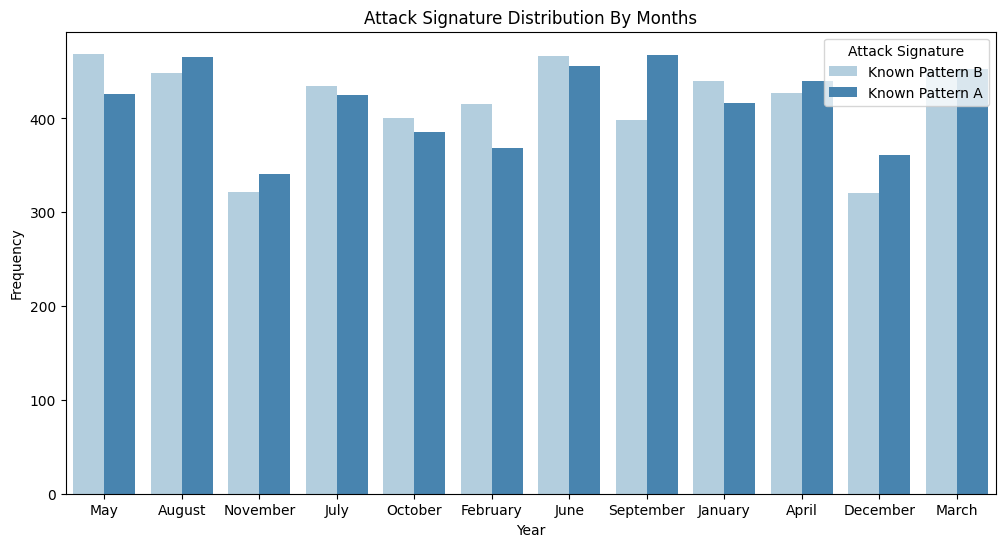

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))
# Create a bar plot
sns.countplot(data=df, x="Month", hue="Attack Signature", palette="Blues")
# Set the title
plt.title("Attack Signature Distribution By Months")
# Label the x-axis
plt.xlabel("Year")
# Label the y-axis
plt.ylabel("Frequency")
# Display the plot
plt.show()

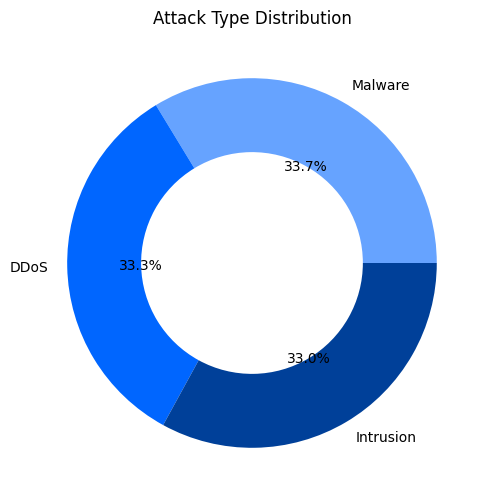

In [ ]:
# Count the occurrences of each attack type in the dataset
attack_type_counts = df["Attack Type"].value_counts()
# Define a color palette for the donut chart
color = ["#66a3ff", "#0066ff", "#004099"]
# Set the figure size
plt.figure(figsize=(8, 6))
# Create a donut chart
plt.pie(attack_type_counts, labels=attack_type_counts.index, autopct="%1.1f%%", colors=color, wedgeprops={"width": 0.4})
# Set the title
plt.title("Attack Type Distribution")
# Display the chart
plt.show()

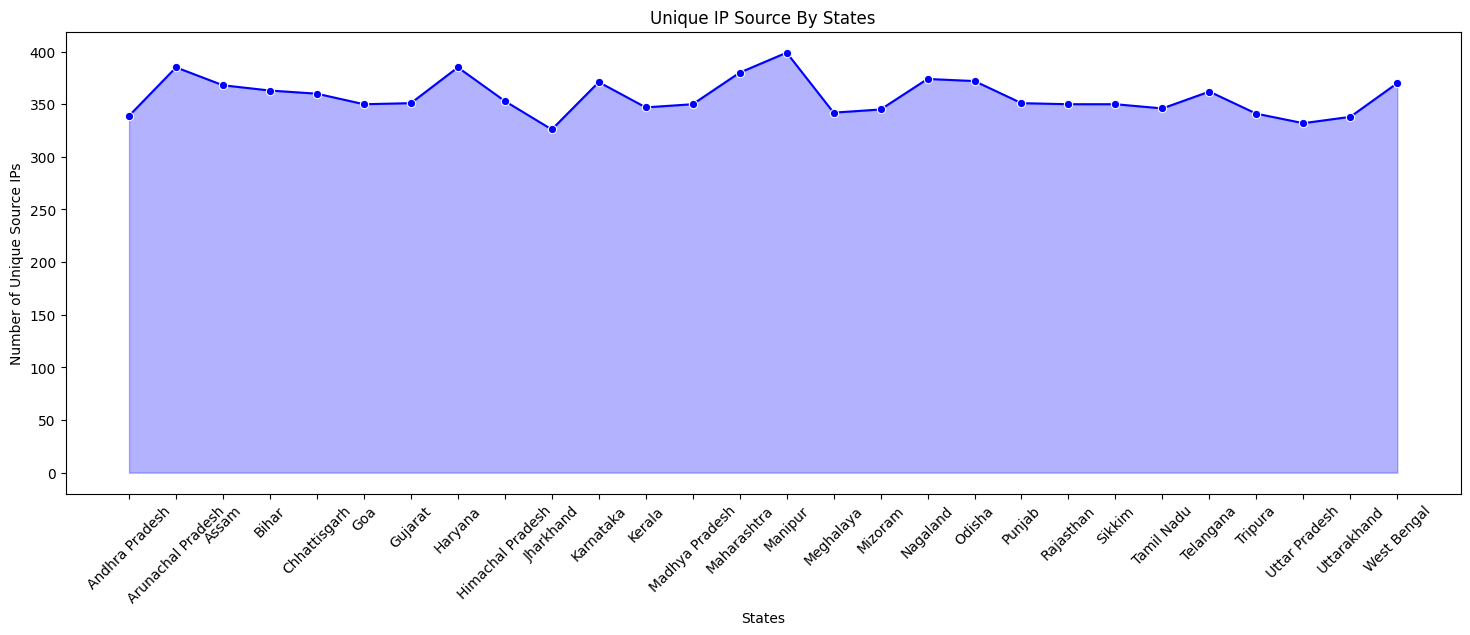

In [ ]:
# Set the figure size
plt.figure(figsize=(18, 6))
# Group by 'States' and count unique 'Source IP Address'
states_source_ips = df.groupby("States")["Source IP Address"].nunique().reset_index(name='Unique Source IPs')
# Create an area plot to visualize the trend of unique IP source over the states
sns.lineplot(data=states_source_ips, x="States", y="Unique Source IPs", marker="o", color="blue")
plt.fill_between(states_source_ips["States"], states_source_ips["Unique Source IPs"], color="blue", alpha=0.3)
# Set the title
plt.title("Unique IP Source By States")
# Label the x-axis
plt.xlabel("States")
# Label the y-axis
plt.ylabel("Number of Unique Source IPs")
# Rotate the x-axis labels
plt.xticks(rotation=45)
# Display the plot
plt.show()

# Conclusion:-

### This analysis highlights time-based cyber threat patterns, protocol vulnerabilities, and regional disparities. Key findings, such as the dominance of DNS attacks and 33% intrusion rates, emphasize the need for targeted cybersecurity measures. These insights provide a foundation for stronger defense strategies across India.